## [Geometric Operations](https://autogis-site.readthedocs.io/en/latest/notebooks/L4/geometric-operations.html)

### overlay analysis

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
import os
%matplotlib inline

In [8]:
# filepath of data
border_file = 'data/Helsinki_borders.shp'
grid_file = 'data/TravelTimes_to_5975375_RailwayStation.shp'

In [9]:
# read files
def read_data(path, driver=None):
    assert os.path.isfile(path), 'Input must be a valid file'
    return gpd.read_file(path) if driver is None else \
        gpd.read_file(path, driver=driver)

grid = read_data(grid_file)
helsinki = read_data(border_file)

- quick visualization of the two layers

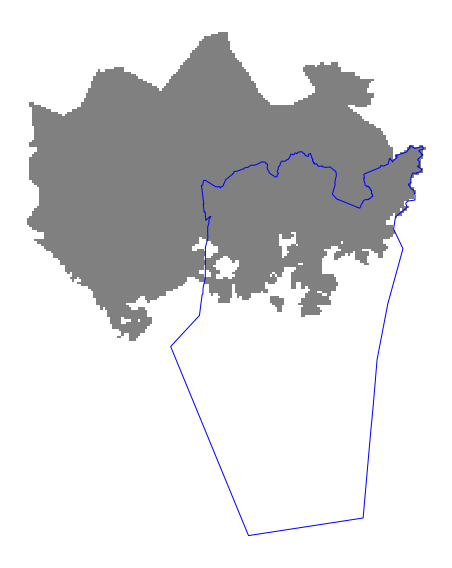

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
grid.plot(ax=ax, facecolor='gray')
helsinki.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.axis('off')
plt.tight_layout()